# Spark: Sales Analytics

## Import Modules

In [104]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.functions import col, expr, split, trim, to_timestamp, round, year, month, hour, count, sum, collect_list, size

import os
import zipfile

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Import Data Set and Create DataFrame

### Initiate Session

In [2]:
spark = SparkSession.builder.appName("SparkAnalyticsSales").getOrCreate()

25/03/11 09:48:13 WARN Utils: Your hostname, Cesars-MBP.local resolves to a loopback address: 127.0.0.1; using 192.168.7.230 instead (on interface en0)
25/03/11 09:48:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/03/11 09:48:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Components for DataFrame

In [3]:
schema = StructType([
    StructField("Order ID", StringType(), True),
    StructField("Product", StringType(), True),
    StructField("Quantity Ordered", StringType(), True),
    StructField("Price Each", StringType(), True),
    StructField("Order Date", StringType(), True),
    StructField("Purchase Address", StringType(), True)
])

In [4]:
# Define path and file name
directory_path = "../../data/input"
file_name = "salesdata.zip"

In [5]:
# Create full path for the zip file
zip_file_path = os.path.join(directory_path, file_name)

# Create extraction directory
extraction_directory = os.path.join(directory_path, os.path.splitext(file_name)[0])

# Confirm the extraction directory exists
os.makedirs(extraction_directory, exist_ok=True)

# Open the zip file and extract the contents
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extraction_directory)

print(f"Extraction complete. Files extracted to: {extraction_directory}")

Extraction complete. Files extracted to: ../../data/input/salesdata


In [6]:
sales_data_df = (spark.read
                .option("header", "true")
                .schema(schema)
                .csv(f"{extraction_directory}/*.csv"))

In [7]:
sales_data_df.show(10)

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  295665|  Macbook Pro Laptop|               1|      1700|12/30/19 00:01|136 Church St, Ne...|
|  295666|  LG Washing Machine|               1|     600.0|12/29/19 07:03|562 2nd St, New Y...|
|  295667|USB-C Charging Cable|               1|     11.95|12/12/19 18:21|277 Main St, New ...|
|  295668|    27in FHD Monitor|               1|    149.99|12/22/19 15:13|410 6th St, San F...|
|  295669|USB-C Charging Cable|               1|     11.95|12/18/19 12:38|43 Hill St, Atlan...|
|  295670|AA Batteries (4-p...|               1|      3.84|12/31/19 22:58|200 Jefferson St,...|
|  295671|USB-C Charging Cable|               1|     11.95|12/16/19 15:10|928 12th St, Port...|
|  295672|USB-C Charging Cable|         

In [8]:
sales_data_df.printSchema()

root
 |-- Order ID: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: string (nullable = true)
 |-- Price Each: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [9]:
sales_data_df.count()

186850

## Part 2: Data Preparation and Cleaning

### Remove All Rows with `NULL` Values and Bad Records

In [10]:
sales_data_df.filter(col("Order ID").isNull() == True).show(5)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
|    null|   null|            null|      null|      null|            null|
+--------+-------+----------------+----------+----------+----------------+
only showing top 5 rows



In [11]:
sales_data_df.filter(col("Order ID") == "Order ID").show(5)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
only showing top 5 rows



In [12]:
sales_data_df.filter(col("Product") == "Product").show(5)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
only showing top 5 rows



In [13]:
sales_data_df.filter(col("Quantity Ordered") == "Quantity Ordered").show(5)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
only showing top 5 rows



In [14]:
sales_data_df.filter(col("Price Each") == "Price Each").show(5)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
only showing top 5 rows



In [15]:
sales_data_df.filter(col("Order Date") == "Order Date").show(5)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
only showing top 5 rows



In [16]:
sales_data_df.filter(col("Purchase Address") == "Purchase Address").show(5)

+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+
only showing top 5 rows



In [17]:
sales_data_clean_df = sales_data_df.filter(col("Order ID") != "Order ID")
sales_data_clean_df = sales_data_clean_df.filter(col("Product") != "Product")
sales_data_clean_df = sales_data_clean_df.filter(col("Quantity Ordered") != "Quantity Ordered")
sales_data_clean_df = sales_data_clean_df.filter(col("Price Each") != "Price Each")
sales_data_clean_df = sales_data_clean_df.filter(col("Order Date") != "Order Date")
sales_data_clean_df = sales_data_clean_df.filter(col("Purchase Address") != "Purchase Address")

In [18]:
sales_data_clean_df = sales_data_clean_df.na.drop("any")

In [19]:
sales_data_clean_df.count()

185950

### Extract City and State from Address into New Columns

In [20]:
sales_data_clean_df.show(3, truncate=False)

+--------+--------------------+----------------+----------+--------------+--------------------------------------+
|Order ID|Product             |Quantity Ordered|Price Each|Order Date    |Purchase Address                      |
+--------+--------------------+----------------+----------+--------------+--------------------------------------+
|295665  |Macbook Pro Laptop  |1               |1700      |12/30/19 00:01|136 Church St, New York City, NY 10001|
|295666  |LG Washing Machine  |1               |600.0     |12/29/19 07:03|562 2nd St, New York City, NY 10001   |
|295667  |USB-C Charging Cable|1               |11.95     |12/12/19 18:21|277 Main St, New York City, NY 10001  |
+--------+--------------------+----------------+----------+--------------+--------------------------------------+
only showing top 3 rows



In [21]:
address_elements = split(col("Purchase Address"), ",")

In [22]:
sales_data_clean_df = (sales_data_clean_df.withColumn("City", trim(address_elements.getItem(1)))
                                         .withColumn("State", split(trim(address_elements.getItem(2)), " ").getItem(0)))

sales_data_clean_df.show(3, truncate=False)

+--------+--------------------+----------------+----------+--------------+--------------------------------------+-------------+-----+
|Order ID|Product             |Quantity Ordered|Price Each|Order Date    |Purchase Address                      |City         |State|
+--------+--------------------+----------------+----------+--------------+--------------------------------------+-------------+-----+
|295665  |Macbook Pro Laptop  |1               |1700      |12/30/19 00:01|136 Church St, New York City, NY 10001|New York City|NY   |
|295666  |LG Washing Machine  |1               |600.0     |12/29/19 07:03|562 2nd St, New York City, NY 10001   |New York City|NY   |
|295667  |USB-C Charging Cable|1               |11.95     |12/12/19 18:21|277 Main St, New York City, NY 10001  |New York City|NY   |
+--------+--------------------+----------------+----------+--------------+--------------------------------------+-------------+-----+
only showing top 3 rows



### Rename and Change Data Types

In [23]:
sales_data_updated_df = (sales_data_clean_df.withColumnRenamed("Order ID", "OrderID")
                                           .withColumnRenamed("Quantity Ordered", "Quantity")
                                           .withColumnRenamed("Price Each", "Price")
                                           .withColumnRenamed("Order Date", "OrderDate")
                                           .withColumnRenamed("Purchase Address", "StoreAddress"))

sales_data_updated_df.show(3, truncate=False)

+-------+--------------------+--------+-----+--------------+--------------------------------------+-------------+-----+
|OrderID|Product             |Quantity|Price|OrderDate     |StoreAddress                          |City         |State|
+-------+--------------------+--------+-----+--------------+--------------------------------------+-------------+-----+
|295665 |Macbook Pro Laptop  |1       |1700 |12/30/19 00:01|136 Church St, New York City, NY 10001|New York City|NY   |
|295666 |LG Washing Machine  |1       |600.0|12/29/19 07:03|562 2nd St, New York City, NY 10001   |New York City|NY   |
|295667 |USB-C Charging Cable|1       |11.95|12/12/19 18:21|277 Main St, New York City, NY 10001  |New York City|NY   |
+-------+--------------------+--------+-----+--------------+--------------------------------------+-------------+-----+
only showing top 3 rows



In [24]:
sales_data_updated_df.dtypes

[('OrderID', 'string'),
 ('Product', 'string'),
 ('Quantity', 'string'),
 ('Price', 'string'),
 ('OrderDate', 'string'),
 ('StoreAddress', 'string'),
 ('City', 'string'),
 ('State', 'string')]

In [25]:
sales_data_updated_df = (sales_data_updated_df.withColumn("OrderID", col("OrderID").cast(IntegerType()))
                                             .withColumn("Quantity", col("Quantity").cast(IntegerType()))
                                             .withColumn("Price", col("Price").cast(FloatType()))
                                             .withColumn("OrderDate", to_timestamp(col("OrderDate"), "MM/dd/yy HH:mm")))

In [26]:
sales_data_updated_df.show(10, truncate=False)

+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+
|OrderID|Product                   |Quantity|Price |OrderDate          |StoreAddress                             |City         |State|
+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+
|295665 |Macbook Pro Laptop        |1       |1700.0|2019-12-30 00:01:00|136 Church St, New York City, NY 10001   |New York City|NY   |
|295666 |LG Washing Machine        |1       |600.0 |2019-12-29 07:03:00|562 2nd St, New York City, NY 10001      |New York City|NY   |
|295667 |USB-C Charging Cable      |1       |11.95 |2019-12-12 18:21:00|277 Main St, New York City, NY 10001     |New York City|NY   |
|295668 |27in FHD Monitor          |1       |149.99|2019-12-22 15:13:00|410 6th St, San Francisco, CA 94016      |San Francisco|CA   |
|295669 |USB-C Charging Cable      |1       |11.95 |201

In [27]:
sales_data_updated_df.printSchema()

root
 |-- OrderID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)
 |-- OrderDate: timestamp (nullable = true)
 |-- StoreAddress: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)



### Add New Columns: ReportYear and ReportMonth

In [28]:
sales_data_updated_df = (sales_data_updated_df.withColumn("ReportYear", year(col("OrderDate")))
                                             .withColumn("ReportMonth", month(col("OrderDate"))))

In [29]:
sales_data_updated_df.show(10, truncate=False)

+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+----------+-----------+
|OrderID|Product                   |Quantity|Price |OrderDate          |StoreAddress                             |City         |State|ReportYear|ReportMonth|
+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+----------+-----------+
|295665 |Macbook Pro Laptop        |1       |1700.0|2019-12-30 00:01:00|136 Church St, New York City, NY 10001   |New York City|NY   |2019      |12         |
|295666 |LG Washing Machine        |1       |600.0 |2019-12-29 07:03:00|562 2nd St, New York City, NY 10001      |New York City|NY   |2019      |12         |
|295667 |USB-C Charging Cable      |1       |11.95 |2019-12-12 18:21:00|277 Main St, New York City, NY 10001     |New York City|NY   |2019      |12         |
|295668 |27in FHD Monitor          |1       |149.99|

In [30]:
sales_data_updated_df.printSchema()

root
 |-- OrderID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)
 |-- OrderDate: timestamp (nullable = true)
 |-- StoreAddress: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ReportYear: integer (nullable = true)
 |-- ReportMonth: integer (nullable = true)



### Export DataFrame to Parquet

In [31]:
export_path = f"../../data/output/sales_analytics"

sales_data_updated_df.write.mode("overwrite").partitionBy("ReportYear", "ReportMonth").parquet(export_path)

## Part 3: Sales Analytics

Prerequisite: Read the Sales Data from the Parquet directory for the 2019 year only.

In [ ]:
directory_path = f"../../data/output/sales_analytics/ReportYear=2019"

sales_data_2019_df = spark.read.parquet(directory_path)

sales_data_2019_df.show(10, truncate=False)
sales_data_2019_df.count()

+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+-----------+
|OrderID|Product                   |Quantity|Price |OrderDate          |StoreAddress                             |City         |State|ReportMonth|
+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+-----------+
|295665 |Macbook Pro Laptop        |1       |1700.0|2019-12-30 00:01:00|136 Church St, New York City, NY 10001   |New York City|NY   |12         |
|295666 |LG Washing Machine        |1       |600.0 |2019-12-29 07:03:00|562 2nd St, New York City, NY 10001      |New York City|NY   |12         |
|295667 |USB-C Charging Cable      |1       |11.95 |2019-12-12 18:21:00|277 Main St, New York City, NY 10001     |New York City|NY   |12         |
|295668 |27in FHD Monitor          |1       |149.99|2019-12-22 15:13:00|410 6th St, San Francisco, CA 94016      |San 

185916

In [64]:
sales_data_2019_df.printSchema()

root
 |-- OrderID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)
 |-- OrderDate: timestamp (nullable = true)
 |-- StoreAddress: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ReportMonth: integer (nullable = true)



### Identify the *best* month in terms of sales 

In [66]:
best_month_df = (sales_data_2019_df.select(col("OrderID"), 
                                           col("Product"),
                                           col("ReportMonth"),
                                           col("Price"),
                                           col("Quantity"),
                                           expr("Price * Quantity").alias("TotalSales")))

best_month_df.show(10)

+-------+--------------------+-----------+------+--------+----------+
|OrderID|             Product|ReportMonth| Price|Quantity|TotalSales|
+-------+--------------------+-----------+------+--------+----------+
| 295665|  Macbook Pro Laptop|         12|1700.0|       1|    1700.0|
| 295666|  LG Washing Machine|         12| 600.0|       1|     600.0|
| 295667|USB-C Charging Cable|         12| 11.95|       1|     11.95|
| 295668|    27in FHD Monitor|         12|149.99|       1|    149.99|
| 295669|USB-C Charging Cable|         12| 11.95|       1|     11.95|
| 295670|AA Batteries (4-p...|         12|  3.84|       1|      3.84|
| 295671|USB-C Charging Cable|         12| 11.95|       1|     11.95|
| 295672|USB-C Charging Cable|         12| 11.95|       2|      23.9|
| 295673|Bose SoundSport H...|         12| 99.99|       1|     99.99|
| 295674|AAA Batteries (4-...|         12|  2.99|       4|     11.96|
+-------+--------------------+-----------+------+--------+----------+
only showing top 10 

In [73]:
summary_month = (best_month_df.groupBy("ReportMonth")
                    .agg(round(sum("TotalSales"), 2).alias("TotalSales"))
                    .orderBy("ReportMonth"))

summary_month.show()
summary_month.orderBy(summary_month["TotalSales"].desc()).show(1)

+-----------+----------+
|ReportMonth|TotalSales|
+-----------+----------+
|          1|1813586.43|
|          2|2202022.41|
|          3|2807100.37|
|          4|3390670.22|
|          5|3152606.73|
|          6|2577802.25|
|          7|2647775.75|
|          8|2244467.87|
|          9|2097560.12|
|         10|3736726.86|
|         11|3199603.18|
|         12|4613443.32|
+-----------+----------+

+-----------+----------+
|ReportMonth|TotalSales|
+-----------+----------+
|         12|4613443.32|
+-----------+----------+
only showing top 1 row



In [76]:
month_df = summary_month.toPandas()
month_df

,ReportMonth,TotalSales
0,1,1813586.43
1,2,2202022.41
2,3,2807100.37
3,4,3390670.22
4,5,3152606.73
5,6,2577802.25
6,7,2647775.75
7,8,2244467.87
8,9,2097560.12
9,10,3736726.86


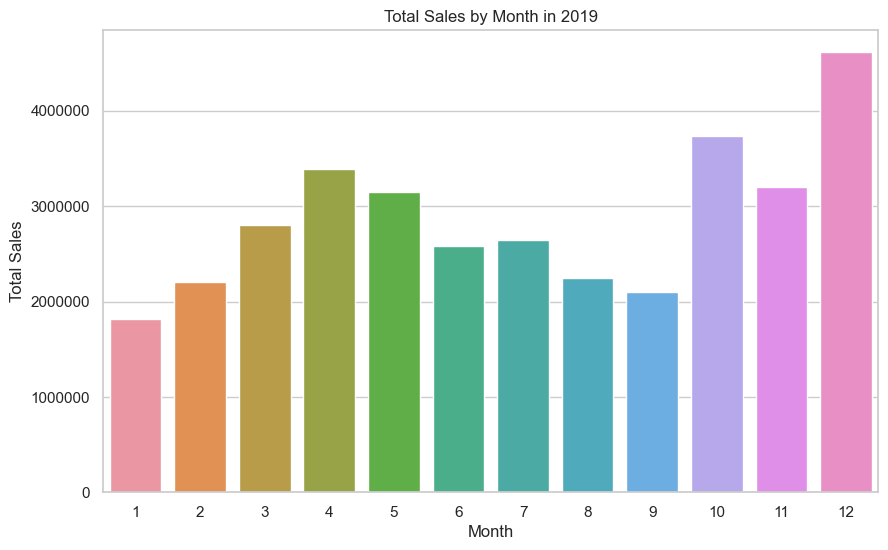

In [80]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(useOffset=False, style="plain")
sns.set_theme(style="whitegrid")
sns.barplot(x="ReportMonth", y="TotalSales", data=month_df).set_title("Total Sales by Month in 2019")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

### Identify the city which sold the most products

In [47]:
best_city = (sales_data_2019_df.groupBy("City")
                    .agg(round(sum("Quantity"), 2).alias("TotalCount"))
                    .orderBy("City"))

best_city.show(10)
best_city.orderBy(best_city["TotalCount"].desc()).show(3)

+-------------+----------+
|         City|TotalCount|
+-------------+----------+
|      Atlanta|     16602|
|       Austin|     11151|
|       Boston|     22524|
|       Dallas|     16728|
|  Los Angeles|     33288|
|New York City|     27916|
|     Portland|     14051|
|San Francisco|     50226|
|      Seattle|     16552|
+-------------+----------+

+-------------+----------+
|         City|TotalCount|
+-------------+----------+
|San Francisco|     50226|
|  Los Angeles|     33288|
|New York City|     27916|
+-------------+----------+
only showing top 3 rows



In [82]:
city_df = best_city.toPandas()
city_df

,City,TotalCount
0,Atlanta,16602
1,Austin,11151
2,Boston,22524
3,Dallas,16728
4,Los Angeles,33288
5,New York City,27916
6,Portland,14051
7,San Francisco,50226
8,Seattle,16552


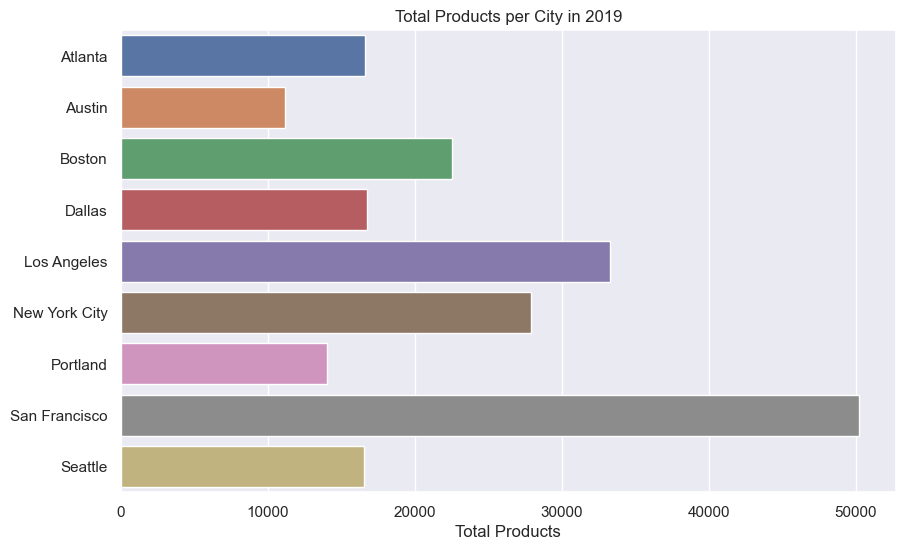

In [87]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(useOffset=False, style="plain")
sns.set_theme(style="darkgrid")
sns.barplot(x="TotalCount", y="City", data=city_df).set_title("Total Products per City in 2019")
plt.xlabel("Total Products")
plt.ylabel("")
plt.show()

### Identify the ideal time to display advertisements to maximize the likelihood of customers buying products

In [50]:
hourly_sales_df = sales_data_2019_df.withColumn("OrderHour", hour(col("OrderDate")))
hourly_sales_df.show(10, truncate=False)

+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+-----------+---------+
|OrderID|Product                   |Quantity|Price |OrderDate          |StoreAddress                             |City         |State|ReportMonth|OrderHour|
+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+-----------+---------+
|295665 |Macbook Pro Laptop        |1       |1700.0|2019-12-30 00:01:00|136 Church St, New York City, NY 10001   |New York City|NY   |12         |0        |
|295666 |LG Washing Machine        |1       |600.0 |2019-12-29 07:03:00|562 2nd St, New York City, NY 10001      |New York City|NY   |12         |7        |
|295667 |USB-C Charging Cable      |1       |11.95 |2019-12-12 18:21:00|277 Main St, New York City, NY 10001     |New York City|NY   |12         |18       |
|295668 |27in FHD Monitor          |1       |149.99|2019-1

In [88]:
hourly_sales_df.printSchema()

root
 |-- OrderID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)
 |-- OrderDate: timestamp (nullable = true)
 |-- StoreAddress: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ReportMonth: integer (nullable = true)
 |-- OrderHour: integer (nullable = true)



In [90]:
hourly_summary = (hourly_sales_df.select("OrderID", "OrderHour").distinct()
                                 .groupBy("OrderHour")
                                 .agg(count("OrderID").alias("TotalOrders"))
                                 .orderBy("OrderHour"))

hourly_summary.show()

+---------+-----------+
|OrderHour|TotalOrders|
+---------+-----------+
|        0|       3748|
|        1|       2246|
|        2|       1189|
|        3|        804|
|        4|        810|
|        5|       1258|
|        6|       2375|
|        7|       3836|
|        8|       6036|
|        9|       8404|
|       10|      10492|
|       11|      11882|
|       12|      12082|
|       13|      11682|
|       14|      10522|
|       15|       9761|
|       16|       9960|
|       17|      10476|
|       18|      11761|
|       19|      12377|
+---------+-----------+
only showing top 20 rows



In [91]:
hourly_summary.orderBy(hourly_summary["TotalOrders"].desc()).show(3)

+---------+-----------+
|OrderHour|TotalOrders|
+---------+-----------+
|       19|      12377|
|       12|      12082|
|       11|      11882|
+---------+-----------+
only showing top 3 rows



In [92]:
hourly_df = hourly_summary.toPandas()
hourly_df

,OrderHour,TotalOrders
0,0,3748
1,1,2246
2,2,1189
3,3,804
4,4,810
5,5,1258
6,6,2375
7,7,3836
8,8,6036
9,9,8404


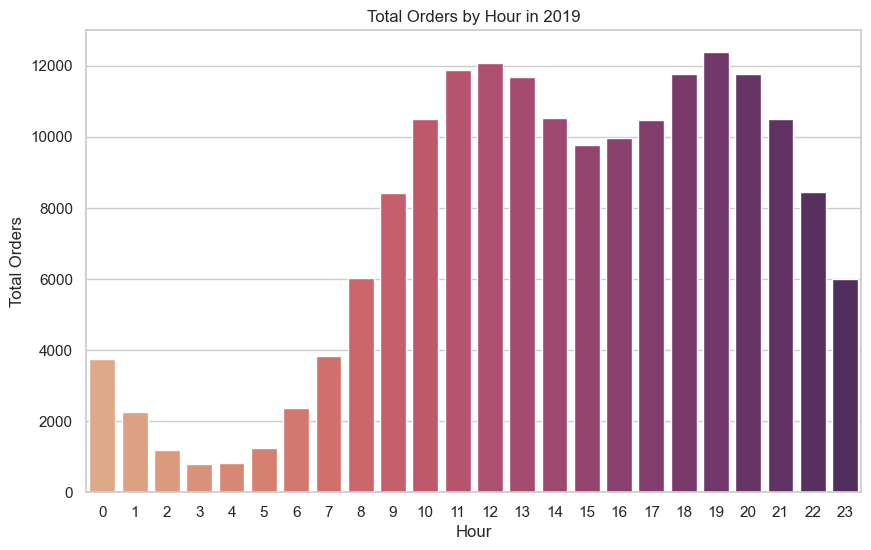

In [102]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(useOffset=False, style="plain")
sns.set_theme(style="whitegrid")
sns.barplot(x="OrderHour", y="TotalOrders", data=hourly_df, palette="flare").set_title("Total Orders by Hour in 2019")
plt.xlabel("Hour")
plt.ylabel("Total Orders")
plt.show()

### Identify the products often sold together in New York state

In [103]:
ny_sales_df = sales_data_2019_df.filter(col("State") == "NY")
               
ny_sales_df.show(10, truncate=False)
ny_sales_df.count()

+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+-----------+
|OrderID|Product                   |Quantity|Price |OrderDate          |StoreAddress                             |City         |State|ReportMonth|
+-------+--------------------------+--------+------+-------------------+-----------------------------------------+-------------+-----+-----------+
|295665 |Macbook Pro Laptop        |1       |1700.0|2019-12-30 00:01:00|136 Church St, New York City, NY 10001   |New York City|NY   |12         |
|295666 |LG Washing Machine        |1       |600.0 |2019-12-29 07:03:00|562 2nd St, New York City, NY 10001      |New York City|NY   |12         |
|295667 |USB-C Charging Cable      |1       |11.95 |2019-12-12 18:21:00|277 Main St, New York City, NY 10001     |New York City|NY   |12         |
|295670 |AA Batteries (4-pack)     |1       |3.84  |2019-12-31 22:58:00|200 Jefferson St, New York City, NY 10001|New 

24866

In [106]:
ny_sales_df = (sales_data_2019_df.groupBy("OrderID", "State")
                             .agg(collect_list("Product").alias("ProductList"))
                             .where(col("State") == "NY"))

In [108]:
ny_sales_df.show(truncate=False)

+-------+-----+-----------------------------------+
|OrderID|State|ProductList                        |
+-------+-----+-----------------------------------+
|141264 |NY   |[Apple Airpods Headphones]         |
|141268 |NY   |[AA Batteries (4-pack)]            |
|141272 |NY   |[AAA Batteries (4-pack)]           |
|141278 |NY   |[Lightning Charging Cable]         |
|141282 |NY   |[Vareebadd Phone]                  |
|141301 |NY   |[Apple Airpods Headphones]         |
|141314 |NY   |[Macbook Pro Laptop]               |
|141317 |NY   |[27in FHD Monitor]                 |
|141323 |NY   |[USB-C Charging Cable]             |
|141343 |NY   |[Bose SoundSport Headphones]       |
|141349 |NY   |[Lightning Charging Cable]         |
|141353 |NY   |[USB-C Charging Cable]             |
|141365 |NY   |[Vareebadd Phone, Wired Headphones]|
|141386 |NY   |[Lightning Charging Cable]         |
|141390 |NY   |[Wired Headphones]                 |
|141391 |NY   |[Bose SoundSport Headphones]       |
|141397 |NY 

In [109]:
ny_sales_df = ny_sales_df.withColumn("ProductListSize", size(col("ProductList")))

In [110]:
(ny_sales_df.filter(col("ProductListSize") > 1)
            .orderBy("ProductList")).show(truncate=False)

+-------+-----+----------------------------------------------------+---------------+
|OrderID|State|ProductList                                         |ProductListSize|
+-------+-----+----------------------------------------------------+---------------+
|158102 |NY   |[20in Monitor, AA Batteries (4-pack)]               |2              |
|266247 |NY   |[20in Monitor, AA Batteries (4-pack)]               |2              |
|194762 |NY   |[20in Monitor, AAA Batteries (4-pack)]              |2              |
|234956 |NY   |[20in Monitor, Apple Airpods Headphones]            |2              |
|256131 |NY   |[20in Monitor, Apple Airpods Headphones]            |2              |
|179885 |NY   |[20in Monitor, Bose SoundSport Headphones]          |2              |
|161337 |NY   |[20in Monitor, Lightning Charging Cable]            |2              |
|277895 |NY   |[20in Monitor, USB-C Charging Cable]                |2              |
|185451 |NY   |[20in Monitor, USB-C Charging Cable]              

In [111]:
(ny_sales_df.filter(col("ProductListSize") > 1)
            .groupBy("ProductList")
            .count()
            .orderBy("count", ascending=False)).show(truncate=False)

+------------------------------------------------------------+-----+
|ProductList                                                 |count|
+------------------------------------------------------------+-----+
|[iPhone, Lightning Charging Cable]                          |126  |
|[Google Phone, USB-C Charging Cable]                        |124  |
|[Google Phone, Wired Headphones]                            |52   |
|[Vareebadd Phone, USB-C Charging Cable]                     |49   |
|[iPhone, Wired Headphones]                                  |46   |
|[iPhone, Apple Airpods Headphones]                          |43   |
|[Google Phone, Bose SoundSport Headphones]                  |23   |
|[Vareebadd Phone, Wired Headphones]                         |17   |
|[Apple Airpods Headphones, Wired Headphones]                |12   |
|[Google Phone, USB-C Charging Cable, Wired Headphones]      |11   |
|[AA Batteries (4-pack), Apple Airpods Headphones]           |10   |
|[Lightning Charging Cable, AAA Ba

In [112]:
# Stop the SparkSession
spark.stop()